In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
uber = pd.read_csv('uber.csv')

In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
uber.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
uber_2 = uber.drop(['Unnamed: 0', 'key'], axis = 1)
uber_2.dropna(axis = 0, inplace = True)

In [9]:
uber_2.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
def haversine(lon_1, lon_2, lat_1, lat_2):
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2]) #degree to the radians
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    
    km = 2*6371*np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2+ np.cos(lat_1)*np.cos(lat_2)*np.sin(diff_lon/2.0)**2))
    return km

In [12]:
uber_2['Distance']= haversine(uber_2['pickup_longitude'],uber_2['dropoff_longitude'],uber_2['pickup_latitude'],uber_2['dropoff_latitude'])

uber_2['Distance']= uber_2['Distance'].astype(float).round(2)

<AxesSubplot: xlabel='fare_amount'>

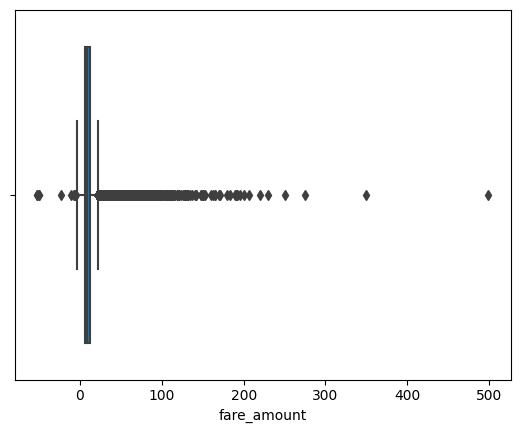

In [14]:
#Outlier detection:
sns.boxplot(x='fare_amount', data = uber_2)

In [16]:
Q1 = np.percentile(uber_2['fare_amount'], 25, interpolation = 'midpoint')
Q3 = np.percentile(uber_2['fare_amount'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print("Upper = ", upper)
print("lower = ", lower)

Upper =  22.25
lower =  -3.75


C:\Users\ishag\AppData\Local\Temp\ipykernel_6664\314064161.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(uber_2['fare_amount'], 25, interpolation = 'midpoint')
C:\Users\ishag\AppData\Local\Temp\ipykernel_6664\314064161.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(uber_2['fare_amount'], 75, interpolation = 'midpoint')


In [18]:
print("Outliers: ")

uber_2[(uber_2['fare_amount']<lower) | (uber_2['fare_amount']>upper)][{'fare_amount'}]

Outliers: 


C:\Users\ishag\AppData\Local\Temp\ipykernel_6664\3446668185.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  uber_2[(uber_2['fare_amount']<lower) | (uber_2['fare_amount']>upper)][{'fare_amount'}]


,fare_amount
6,24.50
30,25.70
34,39.50
39,29.00
48,56.80
...,...
199976,49.70
199977,43.50
199982,57.33
199985,24.00


In [20]:
print("Old Shape ", uber_2.shape)
uber_2 = uber_2[(uber_2['fare_amount'] >= lower) & (uber_2['fare_amount'] <= upper)]
print("New Shape ", uber_2.shape)

Old Shape  (199999, 8)
New Shape  (182833, 8)


<AxesSubplot: xlabel='fare_amount'>

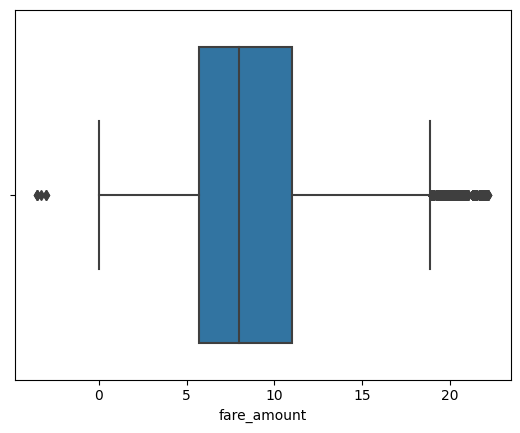

In [21]:
sns.boxplot(x='fare_amount', data = uber_2)

In [22]:
#correlation:
corr_matrix = round(uber_2.corr(),2)
corr_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
fare_amount,1.00,0.00,0.00,-0.00,0.00,0.01,0.00
pickup_longitude,0.00,1.00,-0.81,0.84,-0.85,-0.00,0.10
pickup_latitude,0.00,-0.81,1.00,-0.77,0.68,-0.00,-0.05
dropoff_longitude,-0.00,0.84,-0.77,1.00,-0.91,0.00,0.04
dropoff_latitude,0.00,-0.85,0.68,-0.91,1.00,-0.00,-0.06
passenger_count,0.01,-0.00,-0.00,0.00,-0.00,1.00,-0.00
Distance,0.00,0.10,-0.05,0.04,-0.06,-0.00,1.00


<AxesSubplot: >

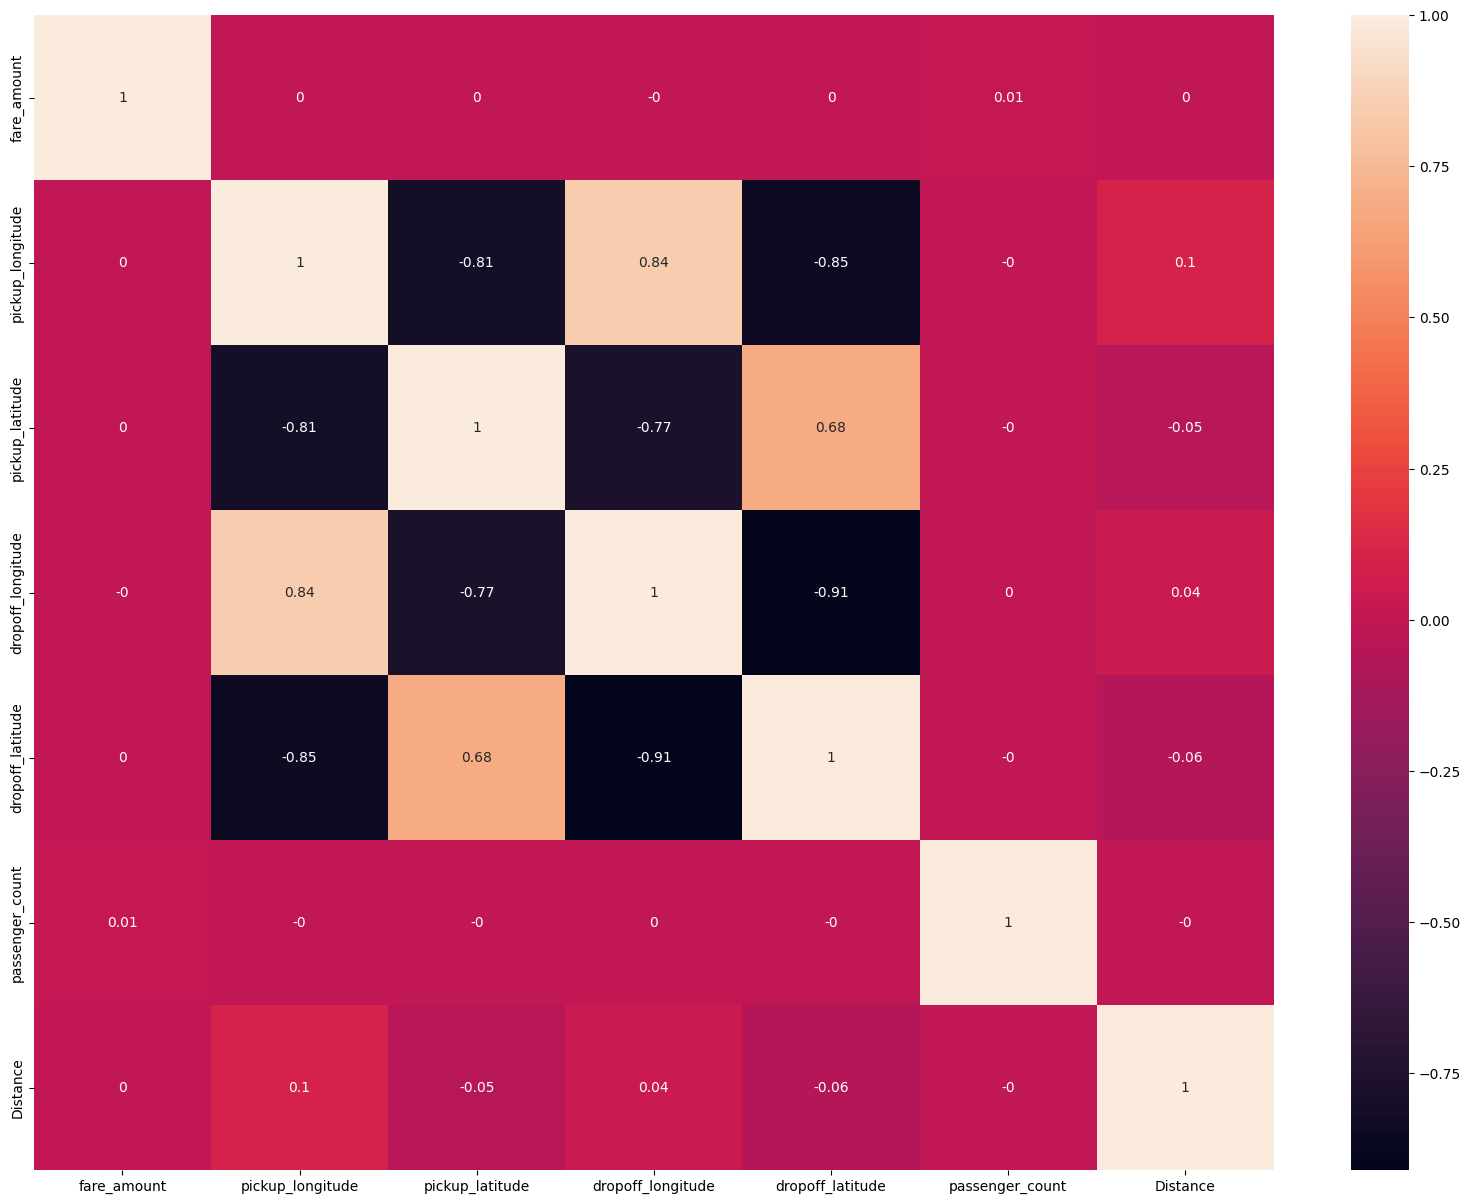

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True)

In [24]:
#Extra:
corr1 = uber_2.corr()
corr1.style.background_gradient(cmap='BuGn')


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
fare_amount,1.000000,0.000367,0.002618,-0.002413,0.000589,0.012618,0.002485
pickup_longitude,0.000367,1.000000,-0.812047,0.835950,-0.850574,-0.000751,0.098120
pickup_latitude,0.002618,-0.812047,1.000000,-0.767103,0.684558,-0.001604,-0.049058
dropoff_longitude,-0.002413,0.835950,-0.767103,1.000000,-0.913949,0.000203,0.039346
dropoff_latitude,0.000589,-0.850574,0.684558,-0.913949,1.000000,-0.000853,-0.064900
passenger_count,0.012618,-0.000751,-0.001604,0.000203,-0.000853,1.000000,-0.000564
Distance,0.002485,0.098120,-0.049058,0.039346,-0.064900,-0.000564,1.000000


In [25]:
#Linear regression: 
x = uber_2['Distance'].values.reshape(-1,1)     #independent variables
y = uber_2['fare_amount'].values.reshape(-1,1)

In [26]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print("Y standard: " ,y_std)

x_std = std.fit_transform(x)
print("X standard: " ,x_std)

Y standard:  [[-0.34757597]
 [-0.29930472]
 [ 0.95574779]
 ...
 [-0.34757597]
 [ 1.34191779]
 [ 1.24537529]]
X standard:  [[-0.04571615]
 [-0.04355605]
 [-0.0364111 ]
 ...
 [-0.04516228]
 [-0.04056514]
 [-0.03535874]]


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_std,y_std,test_size=0.2,random_state=0)

In [29]:
l_reg = LinearRegression()
l_reg.fit(x_train,y_train)

print("Training set score: {:.2f}".format(l_reg.score(x_train,y_train)))
print("Testing set score: {:.2f}".format(l_reg.score(x_test,y_test)))

Training set score: 0.00
Testing set score: -0.00


In [41]:
y_pred = l_reg.predict(x_test)
#df_pred = pd.DataFrame({"Actual:" :y_test, "Predicted:" :y_pred })
#df_pred.head(10)
df = {'Actual: ' :y_test, 'Predicted: ' :y_pred}


In [44]:
#from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score

In [46]:
print("Linear Regression Model: ")
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score",metrics.r2_score(y_test,y_pred))

Linear Regression Model: 
MSE 0.9924160646496647
MAE 0.790185109311085
RMSE 0.9962008154231077
R2 Score -0.00014266103176008293


In [47]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(x_train,y_train)

C:\Users\ishag\AppData\Local\Temp\ipykernel_6664\2138666360.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train,y_train)


RandomForestRegressor(random_state=0)

In [48]:
Y_Pred = regressor.predict(x_test)
Y_Pred

array([ 0.52891406, -0.91518588, -0.82207957, ..., -0.86563981,
       -0.39787285, -0.20285098])

In [49]:
from sklearn.metrics import r2_score
print("Random Forest Regression: ")
print("MSE: ", mean_squared_error(y_test,Y_Pred))
print("MAE: ", mean_absolute_error(y_test,Y_Pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,Y_Pred)))
print("R2 Score", r2_score(y_test,Y_Pred))

Random Forest Regression: 
MSE:  0.32971776742021036
MAE:  0.40823294091581985
RMSE:  0.5742105601782419
R2 Score 0.6677151680192609
